In [5]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

damier = imageio.imread("./img/damier-ng.jpeg")
imageio.imwrite("./img/damier-ng.png", damier)

C:\Users\AxelArcidiaco\AppData\Local\Temp\ipykernel_5928\1244584815.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  damier = imageio.imread("./img/damier-ng.jpeg")


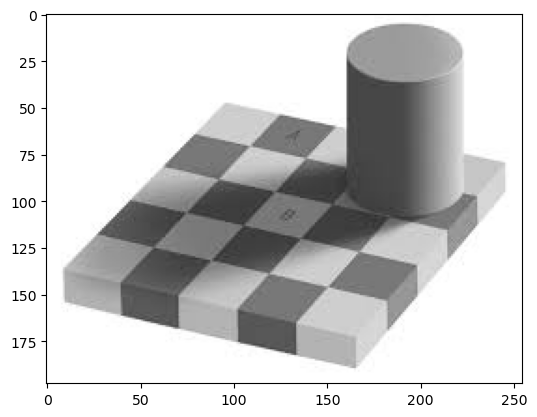

In [6]:
plt.imshow(damier,cmap="gray")

In [7]:
damier.shape

(198, 255, 3)

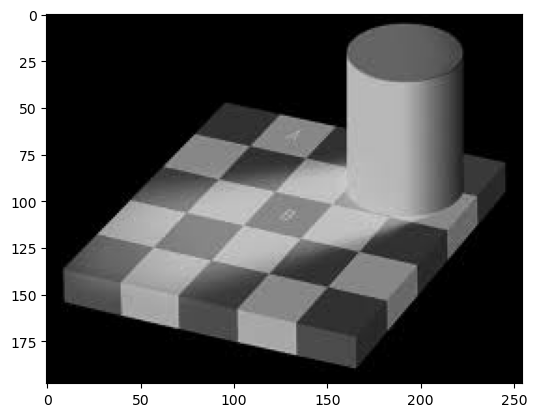

In [13]:
def inverse_intensity(im):
    im_temp = im.copy()
    im_temp = 255-im_temp
    return(im_temp)

test = inverse_intensity(damier)
plt.imshow(test)

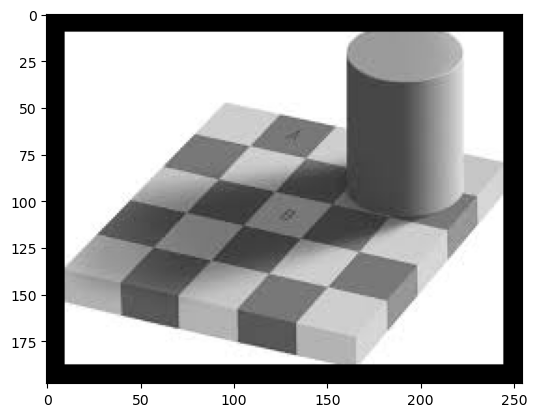

In [14]:
def bord(im,k):
    im_temp = im.copy()
    im_temp[:,:k] = 0
    im_temp[:,-k:] = 0
    im_temp[:k,:] = 0
    im_temp[-k:,:] = 0
    return(im_temp)
plt.imshow(bord(damier,10),cmap="gray")

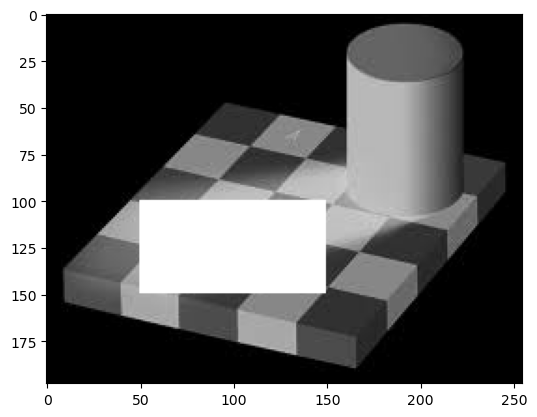

In [19]:
def masque(im,pos,lar,lon):
    im_temp = im.copy()
    im_temp[pos[0]:pos[0]+lon,pos[1]:pos[1]+lar] = 255
    return(im_temp)
plt.imshow(masque(test,[100,50],100,50),cmap="gray")

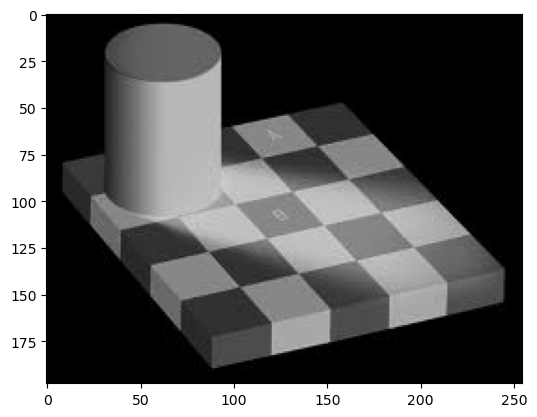

In [20]:
def mirroir_gauche(image):
    image_temp = image.copy()
    image_temp = image_temp[:,::-1,:]
    return image_temp
plt.imshow(mirroir_gauche(test),cmap="gray")

[[0.01 0.02 0.04 0.02 0.01]
 [0.02 0.04 0.08 0.04 0.02]
 [0.04 0.08 0.16 0.08 0.04]
 [0.02 0.04 0.08 0.04 0.02]
 [0.01 0.02 0.04 0.02 0.01]]


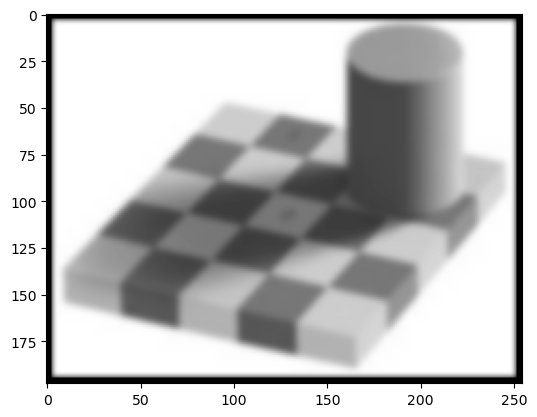

In [22]:
# Filtrer 
K = np.array([[1,2,4,2,1],[2,4,8,4,2],[4,8,16,8,4],[2,4,8,4,2],[1,2,4,2,1]])/100.0
print(K)


def filtrer(im, K):
    im_temp = im.copy()*0
    s = int((K.shape[0]+1)/2)
    for i in range(s, im.shape[0]-s):
        for j in range(s, im.shape[1]-s):
            im_temp[i, j] = np.sum(K*im[i-(s-1):i+s, j-(s-1):j+s])
    return(im_temp)


plt.imshow(filtrer(filtrer(filtrer(damier[:, :, 0], K), K), K), cmap="gray")
